In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

(1367, 1025, 3)

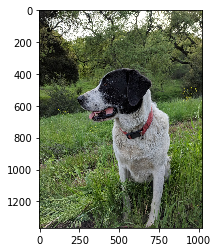

In [6]:
plt.imshow(full)
full.shape

In [4]:
face = cv2.imread('sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

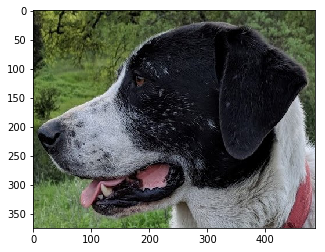

In [5]:
plt.imshow(face)

In [7]:
face.shape

(375, 486, 3)

In [8]:
# All 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function\n",
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

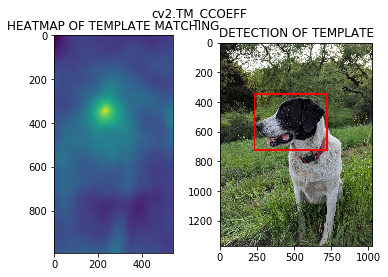

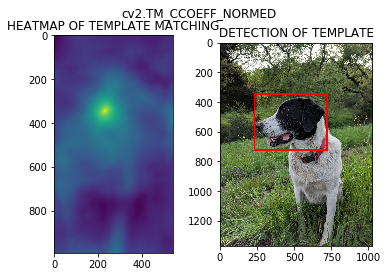

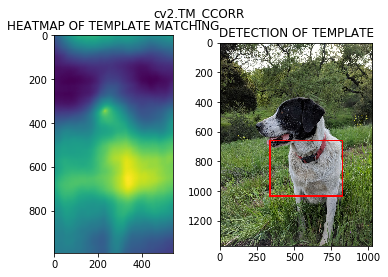

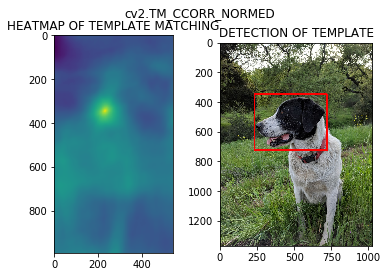

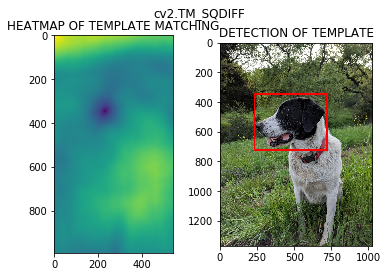

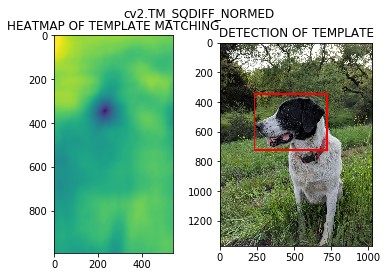

In [9]:
for m in methods:
    
    # Create a copy
    full_copy = full.copy()
    method  = eval(m)
    
    # Template matching
    res = cv2.matchTemplate(full_copy,face,method)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc #(x,y)
    else:
        top_left = max_loc
        
    height,width,channels = face.shape
    
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.rectangle(full_copy,
                  top_left,
                  bottom_right,
                  (255,0,0),
                  10)
    
    # Plot and show the images
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    
    #Ttile with the metgod used
    plt.suptitle(m)
    
    plt.show()
    
    print('\n')
    print('\n')